### 4.4 学习曲线

可是使用交叉验证来估计模型的泛化性能。如果模型在训练数据上表现良好，但根据交叉验证的指标泛化较差，则你的模型过拟合。如果两者的表现均不理想，则说明欠拟合。这是一种区别模型是否过于简单和复杂的方法。

还有一种方法是观察学习曲线：这个曲线绘制的是模型在训练集和验证集上关于训练大小（或训练迭代）的性能函数。要生成这个曲线，只需要在不同大小的训练子集上多次训练模型即可。

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()


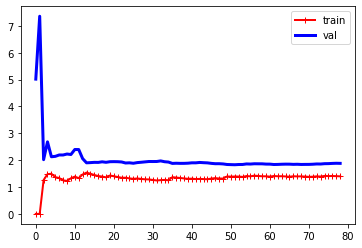

In [12]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * (X ** 2) + 0.9 * X + 2 + np.random.randn(100, 1)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

我们捞一下这个曲线，首先，让我们看一下在训练数据上的性能：当训练集中只有一个或两个实例时，模型可以很好地拟合它们，这就是曲线从零开始的原因。但是，随着将新的实例添加到训练集中，模型就不能完美地拟合训练数据，这是因为数据有噪声，又因为它根本不是线性的。因此，训练数据的误差会一直上升，直到达到平稳状态，此时在训练集中新加实例并不会使平均误差变好或变差。现在我们看一下模型在验证数据上的性能。当很少的训练实例训练模型时，无法正确泛化，这就是验证误差最初很大的原因。然后，随着模型经历更多的训练实例，它开始学习，因此验证误差逐渐降低。当时直线不能很好的对数据进行建模，因此误差最终达到一个平稳的状态，非常接近另外一条曲线。如果你的模型欠拟合训练数据，添加更多训练实例将无济于事。你需要使用更复杂的模型，或者提供更好的特征。

下面是相同数据在10阶多项式上的学习曲线

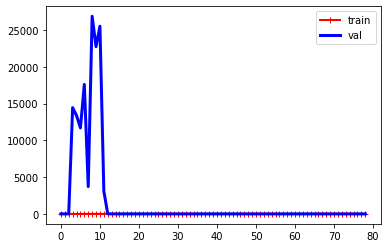

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

ploynomial_regression = Pipeline([
    ('ploy_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(ploynomial_regression, X, y)

- 与线性回归模型相比，训练数据上的误差要低得多
- 曲线之间存在间隙，这意味着该模型在训练数据上的性能要比在验证数据上的性能好得多，这是过拟合模型的标志。但是，如果你要使用更大的训练集，则两条曲线会继续接近。

**偏差/方差权衡**

**偏差**: 这部分泛化误差的原因在于错误的假设，必须假设数据是线性的，而实际上是二次的。高偏差模型最有可能欠拟合训练数据。

**方差**: 这部分是由于模型对训练数据的细微变化过于敏感，具有许多自由度的模型（例如高阶多项式模型）可能具有较高的偏差，因此可能过拟合训练数据。

**不可避免的误差**: 这部分误差是因为数据本身的噪声所致。减少这部分误差的唯一方法就是清理数据（例如修复数据源，或者检测并移除异常值）。